In [101]:
import FinanceDataReader as fdr
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
from sklearn.model_selection import train_test_split


from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [106]:
train_path = 'DailyDelhiClimateTrain.csv'
test_path = 'DailyDelhiClimateTest.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

train_data

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


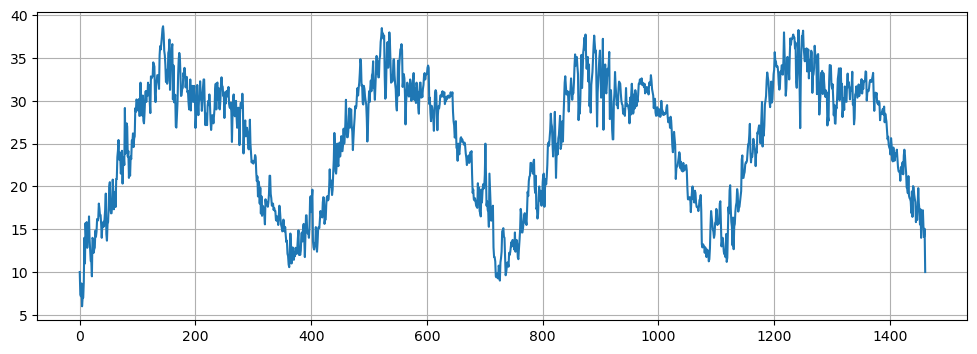

In [66]:
train_data['meantemp'].plot(figsize=(12,4), grid=True);

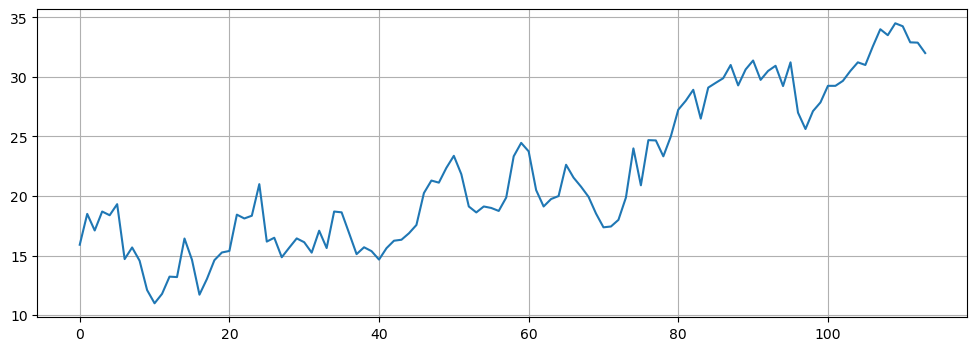

In [107]:
test_data['meantemp'].plot(figsize=(12,4), grid=True);

In [67]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [68]:
train_data = train_data.drop(['date'], axis = 1)
train_data = MinMaxScaler(train_data)
X_train = train_data.drop(['meantemp'], axis = 1)
y_train = train_data['meantemp']

In [69]:
y_train.shape

(1462,)

In [70]:
test_data = test_data.drop(['date'], axis = 1)
test_data = MinMaxScaler(test_data)
X_test = test_data.drop(['meantemp'], axis = 1)
y_test = test_data['meantemp']

In [71]:
X_test

,humidity,wind_speed,meanpressure
0,0.872396,0.075640,0.000000
1,0.761651,0.084061,0.995298
2,0.821416,0.146661,0.995356
3,0.669797,0.176133,0.992624
4,0.732480,0.106684,0.991206
...,...,...,...
109,0.124867,0.232892,0.974907
110,0.276948,0.310987,0.976204
111,0.296478,0.418508,0.977994
112,0.124867,0.478334,0.978539


In [72]:
y_test.shape

(114,)

In [73]:
X = np.array(X_train)
y = np.array(y_train)

window_size = 5

X_train = []
y_train = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    X_train.append(_X)
    y_train.append(_y)
    print(_X, "->", _y)

[[0.82095709 0.         0.13260331]
 [0.90759076 0.07058266 0.132881  ]
 [0.84983498 0.10974262 0.13299381]
 [0.66886689 0.02921206 0.13279856]
 [0.84790979 0.08763619 0.13271178]] -> 0.0305676854960813
[[0.90759076 0.07058266 0.132881  ]
 [0.84983498 0.10974262 0.13299381]
 [0.66886689 0.02921206 0.13279856]
 [0.84790979 0.08763619 0.13271178]
 [0.80132013 0.03505448 0.13290703]] -> 0.0305676854960813
[[0.84983498 0.10974262 0.13299381]
 [0.66886689 0.02921206 0.13279856]
 [0.84790979 0.08763619 0.13271178]
 [0.80132013 0.03505448 0.13290703]
 [0.75280528 0.14921838 0.13316737]] -> 0.08733624427451803
[[0.66886689 0.02921206 0.13279856]
 [0.84790979 0.08763619 0.13271178]
 [0.80132013 0.03505448 0.13290703]
 [0.75280528 0.14921838 0.13316737]
 [0.58085809 0.16918184 0.13300001]] -> 0.2445414839686504
[[0.84790979 0.08763619 0.13271178]
 [0.80132013 0.03505448 0.13290703]
 [0.75280528 0.14921838 0.13316737]
 [0.58085809 0.16918184 0.13300001]
 [0.43688119 0.29606821 0.13277686]] -> 0.1

[[0.36179868 0.06572714 0.13250026]
 [0.39500825 0.06039792 0.13256534]
 [0.44265677 0.06572714 0.13266297]
 [0.45709571 0.04944339 0.13289076]
 [0.51629538 0.02753434 0.13271178]] -> 0.4394104790061687
[[0.39500825 0.06039792 0.13256534]
 [0.44265677 0.06572714 0.13266297]
 [0.45709571 0.04944339 0.13289076]
 [0.51629538 0.02753434 0.13271178]
 [0.47586634 0.07164851 0.13230501]] -> 0.37445414732699595
[[0.44265677 0.06572714 0.13266297]
 [0.45709571 0.04944339 0.13289076]
 [0.51629538 0.02753434 0.13271178]
 [0.47586634 0.07164851 0.13230501]
 [0.5625     0.07668167 0.13222365]] -> 0.4241266362581281
[[0.45709571 0.04944339 0.13289076]
 [0.51629538 0.02753434 0.13271178]
 [0.47586634 0.07164851 0.13230501]
 [0.5625     0.07668167 0.13222365]
 [0.52495875 0.03848887 0.13204467]] -> 0.3400655011439045
[[0.51629538 0.02753434 0.13271178]
 [0.47586634 0.07164851 0.13230501]
 [0.5625     0.07668167 0.13222365]
 [0.52495875 0.03848887 0.13204467]
 [0.50763201 0.03286357 0.13246772]] -> 0.3

In [74]:
X = np.array(X_test)
y = np.array(y_test)

window_size = 5

X_test = []
y_test = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    X_test.append(_X)
    y_test.append(_y)
print(_X, "->", _y)

[[0.08164354 0.42603845 0.97724185]
 [0.1248666  0.23289172 0.97490736]
 [0.27694771 0.31098715 0.9762043 ]
 [0.29647812 0.41850782 0.97799407]
 [0.1248666  0.47833449 0.97853878]] -> 0.89361701747397


In [75]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

In [76]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [77]:
X_train.shape

(1457, 5, 3)

In [102]:
model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=(5,3), return_sequences=True),
    Dropout(0.5),
    SimpleRNN(20, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 20)             480       
                                                                 
 dropout_10 (Dropout)        (None, 5, 20)             0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics= 'mae')
history = model.fit(X_train, y_train, epochs=70, batch_size=30)
pred_y = model.predict(X_test)

Epoch 1/70
49/49 [==============================] - 5s 7ms/step - loss: 0.1981 - mae: 0.3664
Epoch 2/70
49/49 [==============================] - 0s 7ms/step - loss: 0.1005 - mae: 0.2595
Epoch 3/70
49/49 [==============================] - 0s 6ms/step - loss: 0.0787 - mae: 0.2267
Epoch 4/70
49/49 [==============================] - 0s 8ms/step - loss: 0.0639 - mae: 0.2047
Epoch 5/70
49/49 [==============================] - 0s 7ms/step - loss: 0.0596 - mae: 0.1982
Epoch 6/70
49/49 [==============================] - 0s 8ms/step - loss: 0.0538 - mae: 0.1884
Epoch 7/70
49/49 [==============================] - 0s 7ms/step - loss: 0.0499 - mae: 0.1828
Epoch 8/70
49/49 [==============================] - 0s 7ms/step - loss: 0.0493 - mae: 0.1815
Epoch 9/70
49/49 [==============================] - 0s 6ms/step - loss: 0.0484 - mae: 0.1808
Epoch 10/70
49/49 [==============================] - 0s 8ms/step - loss: 0.0476 - mae: 0.1833
Epoch 11/70
49/49 [==============================] - 0s 7ms/step - lo

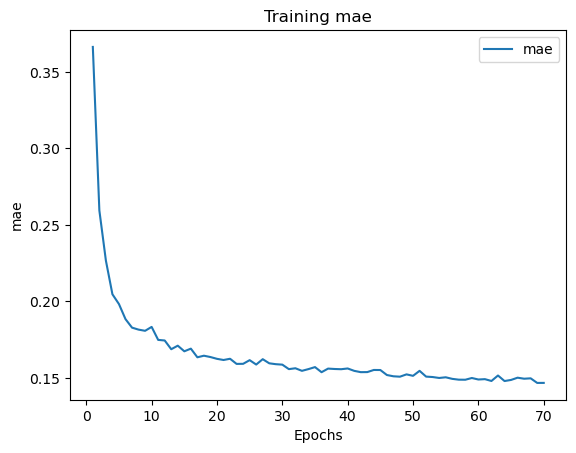

In [104]:
history_dict = history.history
mae = history_dict['mae']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['mae'] 
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, label='mae') 

plt.title('Training mae') 
plt.xlabel('Epochs')
plt.ylabel('mae') 
plt.legend()
plt.show()

4/4 [==============================] - 0s 6ms/step


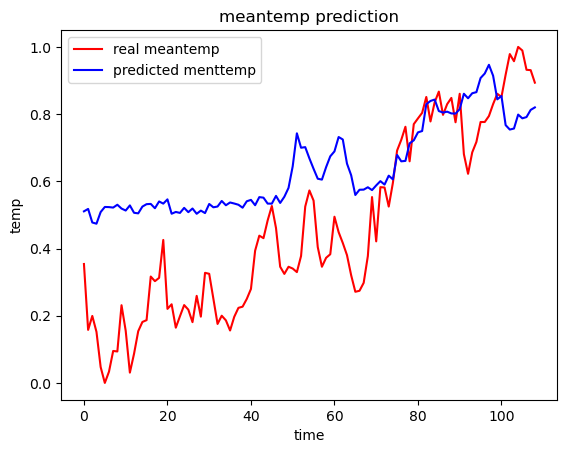

In [105]:
pred_y = model.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='real meantemp')
plt.plot(pred_y, color='blue', label='predicted menttemp')
plt.title('meantemp prediction')
plt.xlabel('time')
plt.ylabel('temp')
plt.legend()
plt.show()

# LSTM

In [95]:
model = Sequential()
model.add(LSTM(units=16, activation='relu', return_sequences=True, input_shape=(5, 3)))
model.add(LSTM(32))
#model.add(Dropout(0.1))
#model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 5, 16)             1280      
                                                                 
 lstm_13 (LSTM)              (None, 32)                6272      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7,585
Trainable params: 7,585
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics= 'mae')
history = model.fit(X_train, y_train, epochs=70, batch_size=30)
pred_y = model.predict(X_test)

Epoch 1/70
49/49 [==============================] - 7s 10ms/step - loss: 0.1435 - mae: 0.3138
Epoch 2/70
49/49 [==============================] - 0s 9ms/step - loss: 0.0446 - mae: 0.1763
Epoch 3/70
49/49 [==============================] - 0s 9ms/step - loss: 0.0362 - mae: 0.1603
Epoch 4/70
49/49 [==============================] - 1s 11ms/step - loss: 0.0353 - mae: 0.1571
Epoch 5/70
49/49 [==============================] - 1s 11ms/step - loss: 0.0353 - mae: 0.1585
Epoch 6/70
49/49 [==============================] - 0s 9ms/step - loss: 0.0355 - mae: 0.1579
Epoch 7/70
49/49 [==============================] - 0s 8ms/step - loss: 0.0355 - mae: 0.1580
Epoch 8/70
49/49 [==============================] - 0s 9ms/step - loss: 0.0353 - mae: 0.1571
Epoch 9/70
49/49 [==============================] - 1s 11ms/step - loss: 0.0348 - mae: 0.1562
Epoch 10/70
49/49 [==============================] - 1s 11ms/step - loss: 0.0346 - mae: 0.1561
Epoch 11/70
49/49 [==============================] - 1s 11ms/ste

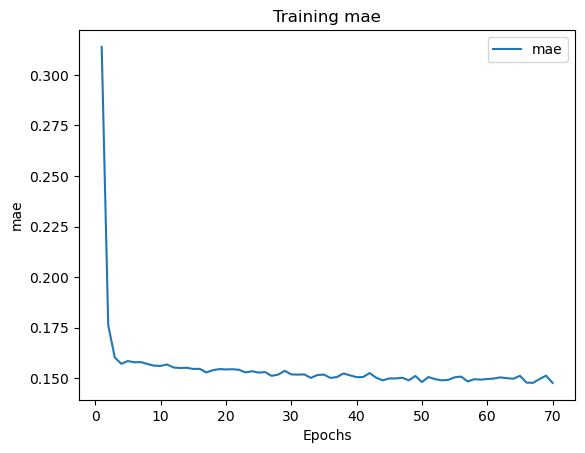

In [98]:
history_dict = history.history
mae = history_dict['mae']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['mae'] 
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, label='mae') 

plt.title('Training mae') 
plt.xlabel('Epochs')
plt.ylabel('mae') 
plt.legend()
plt.show()

4/4 [==============================] - 0s 8ms/step


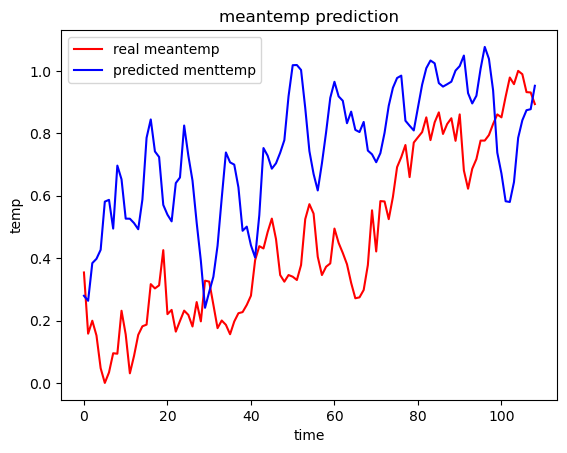

In [99]:
pred_y = model.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='real meantemp')
plt.plot(pred_y, color='blue', label='predicted menttemp')
plt.title('meantemp prediction')
plt.xlabel('time')
plt.ylabel('temp')
plt.legend()
plt.show()

# CNN

In [89]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(5,3)))
model.add(Conv1D(filters=32, kernel_size=2, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())

model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dense(units=1))
model.summary()

 
 # fit network

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 4, 32)             224       
                                                                 
 conv1d_3 (Conv1D)           (None, 3, 32)             2080      
                                                                 
 dropout_7 (Dropout)         (None, 3, 32)             0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [92]:
model.compile(optimizer='adam', loss='mean_squared_error',metrics= 'mae')
history = model.fit(X_train, y_train, epochs=70, batch_size=30)
pred_y = model.predict(x_test)

Epoch 1/70
49/49 [==============================] - 2s 4ms/step - loss: 0.1047 - mae: 0.2611
Epoch 2/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0481 - mae: 0.1800
Epoch 3/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0416 - mae: 0.1698
Epoch 4/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0402 - mae: 0.1672
Epoch 5/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0373 - mae: 0.1623
Epoch 6/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0370 - mae: 0.1630
Epoch 7/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0362 - mae: 0.1603
Epoch 8/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0353 - mae: 0.1585
Epoch 9/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0354 - mae: 0.1582
Epoch 10/70
49/49 [==============================] - 0s 4ms/step - loss: 0.0352 - mae: 0.1574
Epoch 11/70
49/49 [==============================] - 0s 4ms/step - lo

NameError: name 'x_test' is not defined

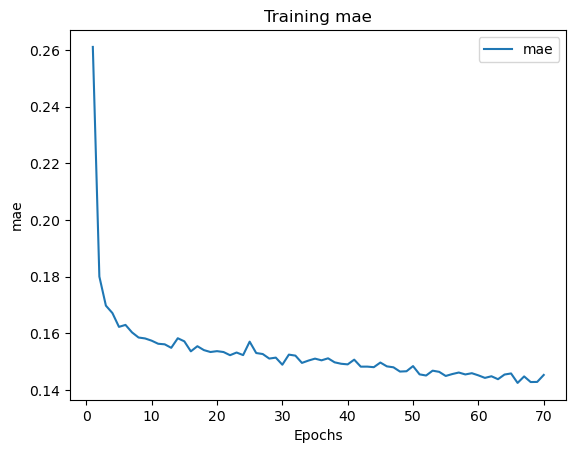

In [93]:
history_dict = history.history
mae = history_dict['mae']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['mae'] 
epochs = range(1, len(mae) + 1)
plt.plot(epochs, loss_values, label='mae') 

plt.title('Training mae') 
plt.xlabel('Epochs')
plt.ylabel('mae') 
plt.legend()
plt.show()

4/4 [==============================] - 0s 6ms/step


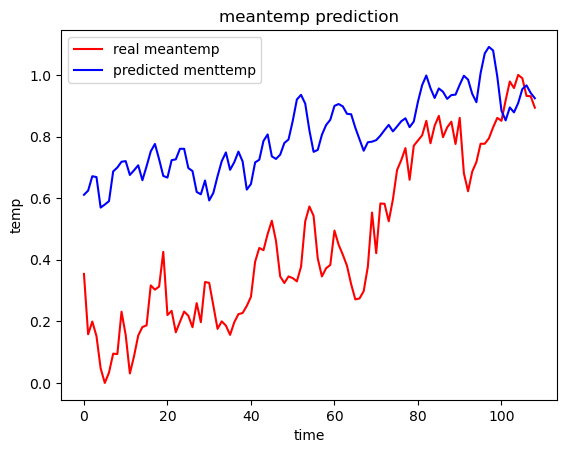

In [94]:
pred_y = model.predict(X_test)

plt.figure()
plt.plot(y_test, color='red', label='real meantemp')
plt.plot(pred_y, color='blue', label='predicted menttemp')
plt.title('meantemp prediction')
plt.xlabel('time')
plt.ylabel('temp')
plt.legend()
plt.show()
#df.Close[-1] : dfy.Close[-1] = y : pred_y[-1]